In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis using dataframes
import seaborn as sns  # For data visualisation, including loading example datasets
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize (scale) numerical features
from sklearn.linear_model import LogisticRegression  # To build the logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # These metrics are used to evaluate the performance of the model

In [ ]:
# Load the Titanic dataset from Seaborn
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Handling missing values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

<ipython-input-112-f3737f2fc7af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

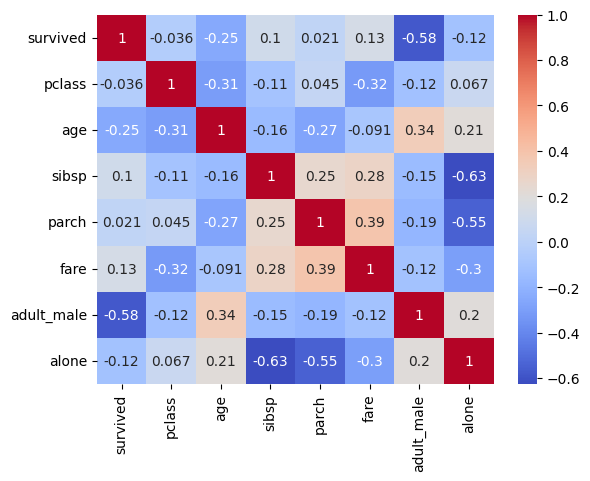

In [ ]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

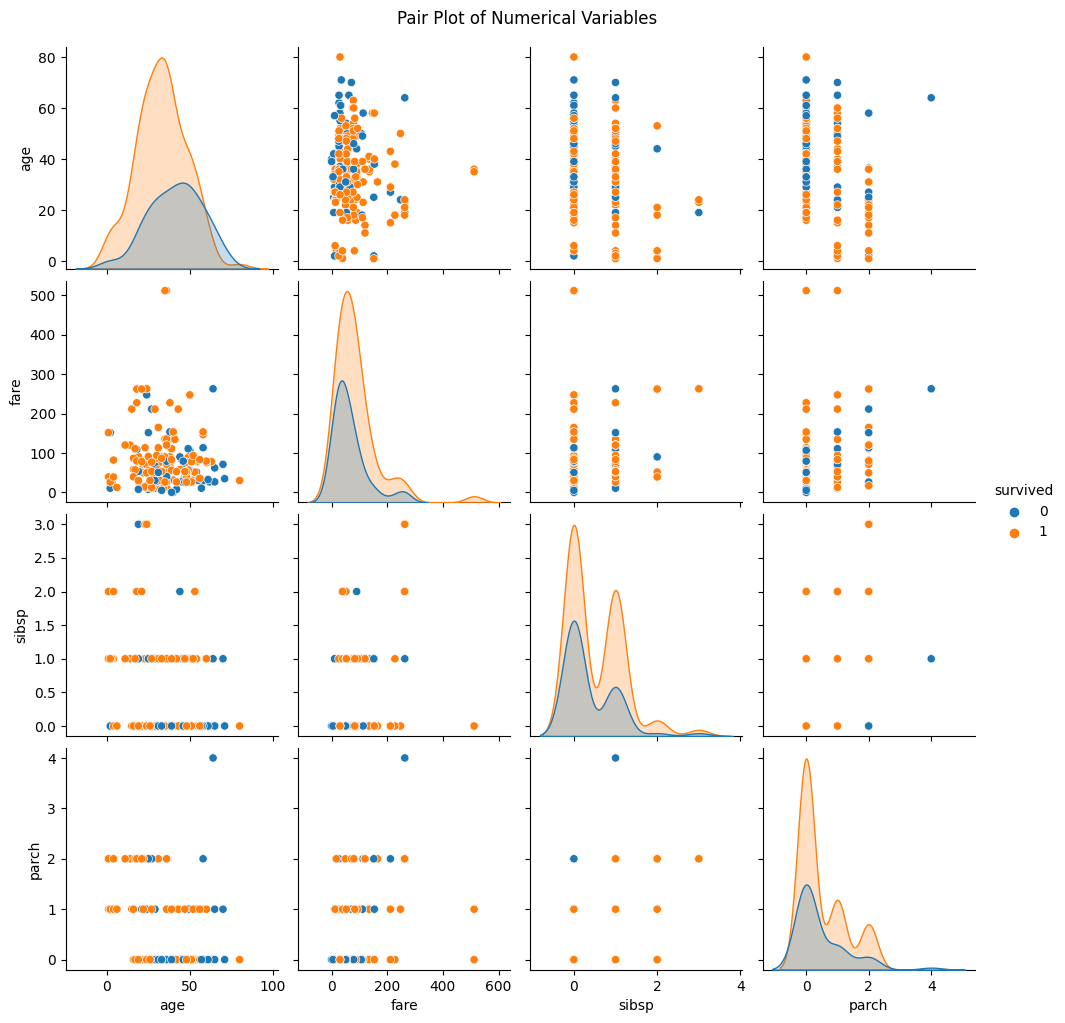

In [ ]:
# Pair plot of selected numerical variables
sns.pairplot(data=df, vars=["age", "fare", "sibsp", "parch"], hue="survived")
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

In [ ]:
# Preprocessing
selected_features = ["pclass", "age", "sibsp", "parch", "fare"]
X = df[selected_features]  # Features (including only the selected features)
y = df["survived"]  # Target variable

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardiae features (scaling)
scaler = StandardScaler()  # Initialise a scaler for feature scaling

# Fit and transform the training data using the scaler
X_train_scaled = scaler.fit_transform(X_train)
# The scaler learns the mean and standard deviation from the training data
# and transforms the features to have a mean of 0 and a standard deviation of 1

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
# We only transform the test data using the learned mean and standard deviation from the training data
# This ensures that the test data is scaled in the same way as the training data


In [ ]:
# Model training
model = LogisticRegression()  # Initialise Logistic Regression model
model.fit(X_train_scaled, y_train)  # Train the model

LogisticRegression()

In [ ]:
# Evaluation
y_pred = model.predict(X_test_scaled)  # Use the trained model to predict on the scaled test data

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
# Accuracy is the ratio of correct predictions to total predictions made by the model

# Create a confusion matrix to understand the model's predictions
confusion = confusion_matrix(y_test, y_pred)
# A confusion matrix helps us see how many predictions were correct or incorrect
# It's a table that shows the count of true positive, true negative, false positive, and false negative predictions

# Generate a classification report to get detailed performance metrics
classification_rep = classification_report(y_test, y_pred)
# A classification report provides precision, recall, F1-score, and support values for each class
# It gives us insights into how well the model performs for each class, along with an overall average


# Display evaluation results
print("Evaluation Results:")
print("-" * 40)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", classification_rep)



Evaluation Results:
----------------------------------------
Accuracy: 0.6486486486486487

Confusion Matrix:
 [[ 2 12]
 [ 1 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.65      0.96      0.77        23

    accuracy                           0.65        37
   macro avg       0.66      0.55      0.50        37
weighted avg       0.65      0.65      0.57        37




An accuracy of 0.6486 (rounded) means that the model correctly predicted the survival outcome of approximately 64.86% of the passengers in the test dataset. In other words, out of all the predictions made by the model on the test data, about 64.86% of them were accurate.

In [ ]:
# Interpretation of Coefficients
# Coefficients help us understand the influence of each feature on the prediction
coef = model.coef_.ravel()  # Get the coefficients learned by the model
intercept = model.intercept_  # Get the intercept of the model
feature_names = X.columns  # Get the names of the features

# Create a DataFrame to display the coefficients for each feature
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})

# Print the coefficient table to see how each feature affects the prediction
print("Interpretation of Coefficients:")
print("-" * 40)
print(coef_df)



Interpretation of Coefficients:
----------------------------------------
  Feature  Coefficient
0  pclass    -0.034388
1     age    -0.453954
2   sibsp    -0.063493
3   parch    -0.308029
4    fare     0.505009


The coefficients in the table represent the impact of each corresponding feature on the prediction outcome (survival or not) according to the logistic regression model. Here's how to interpret these coefficients:


pclass: For every unit increase in "pclass" (higher class number indicating lower class), the log-odds of survival decrease by approximately 0.034. In simpler terms, being in a higher passenger class is associated with a lower likelihood of survival.


age: For every unit increase in "age," the log-odds of survival decrease by about 0.454. This suggests that older passengers have a lower likelihood of survival compared to younger passengers.


sibsp: A unit increase in "sibsp" (number of siblings/spouses aboard) results in a decrease of about 0.064 in the log-odds of survival. This implies that having more siblings or spouses aboard is associated with a slightly lower chance of survival.


parch: Similarly, an increase of one unit in "parch" (number of parents/children aboard) leads to a decrease of approximately 0.308 in the log-odds of survival. More parents or children aboard is correlated with a lower probability of survival.


fare: For each unit increase in "fare" (ticket price), the log-odds of survival increase by around 0.505. This indicates that passengers who paid higher fares have a higher likelihood of survival.


In general, positive coefficients (like "fare") indicate a positive effect on the likelihood of survival, while negative coefficients (like "age", "pclass", "sibsp", and "parch") suggest a negative effect on survival odds. The magnitude of the coefficient indicates the strength of the impact, and interpreting coefficients allows us to understand the relationship between each feature and the prediction outcome.

In [ ]:
# Prediction for new input
new_input = pd.DataFrame({
    "pclass": [3],
    "age": [25],
    "sibsp": [0],
    "parch": [1],
    "fare": [20]
})

# Standardise new input numerical features
new_input_scaled = scaler.transform(new_input)

# Make prediction for new input
prediction = model.predict(new_input_scaled)
print("\nPrediction for New Input:", prediction[0])

# Interpretation of Prediction
if prediction[0] == 1:
    print("The model predicts that the passenger in the new input would have survived.")
else:
    print("The model predicts that the passenger in the new input would not have survived.")


Prediction for New Input: 1
The model predicts that the passenger in the new input would have survived.
